# Imports and Constants

In [1]:
from mtgsdk import Card as crd
from IPython.display import display, Image
from PIL import Image
from os import listdir
from sklearn.cluster import KMeans
from skimage.measure import compare_ssim as ssim
import cv2
import requests
import io
import os
import pandas as pd
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

DATA_DIR="Data"
IMAGE_PATH="{}/Images"

# Getting the Database

Run this cell if you do not have an up to date cardData.csv file in your data directory.

In [8]:
cards = crd.all()
cDict = [c.__dict__ for c in cards]
df = pd.DataFrame(cDict)
if(not os.path.exists(DATA_DIR)):
    os.makedirs(DATA_DIR)
df.to_csv('Data/cardData.csv', encoding='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35983 entries, 0 to 35982
Data columns (total 39 columns):
artist            35983 non-null object
border            22 non-null object
cmc               35983 non-null float64
color_identity    31897 non-null object
colors            28223 non-null object
flavor            21356 non-null object
foreign_names     23871 non-null object
hand              116 non-null float64
id                35983 non-null object
image_url         33753 non-null object
layout            35983 non-null object
legalities        35171 non-null object
life              116 non-null float64
loyalty           203 non-null float64
mana_cost         31671 non-null object
multiverse_id     33753 non-null float64
name              35983 non-null object
names             475 non-null object
number            29781 non-null object
original_text     33298 non-null object
original_type     34034 non-null object
power             16760 non-null object
printings        

Run this cell if you already have the csv file.

In [7]:
df = pd.read_csv("Data/cardData.csv")
df.info()

C:\Users\Nicholas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2,18,25,29,30,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35983 entries, 0 to 35982
Data columns (total 40 columns):
Unnamed: 0        35983 non-null int64
artist            35983 non-null object
border            22 non-null object
cmc               35983 non-null float64
color_identity    31897 non-null object
colors            28223 non-null object
flavor            21356 non-null object
foreign_names     23871 non-null object
hand              116 non-null float64
id                35983 non-null object
image_url         33753 non-null object
layout            35983 non-null object
legalities        35171 non-null object
life              116 non-null float64
loyalty           203 non-null float64
mana_cost         31671 non-null object
multiverse_id     33753 non-null float64
name              35983 non-null object
names             475 non-null object
number            29781 non-null object
original_text     33298 non-null object
original_type     34034 non-null object
power             

<h3>Trim dataframe to Contain Only Card Name and Image Path of Correct Set</h3>

In [25]:
df[["name", "image_url"]].head(10)
dftemp = df.loc[df['set_name'] == 'Ixalan']
dfimg = dftemp[['name', 'set_name', 'image_url']].dropna()
dfimg.head(10)

,name,set_name,image_url
11932,Adanto Vanguard,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...
11933,Ashes of the Abhorrent,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...
11934,Axis of Mortality,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...
11935,Bellowing Aegisaur,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...
11936,Bishop of Rebirth,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...
11937,Bishop's Soldier,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...
11938,Bright Reprisal,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...
11939,Demystify,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...
11940,Duskborne Skymarcher,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...
11941,Emissary of Sunrise,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...


<h3>Fill directory with images to compare to.</h3>

In [26]:
for index,row in dfimg.iterrows():
    url=row.image_url
    name = row['name']
    set_name = row.set_name
    directory = "Data/Images/{}".format(set_name)
    if(not os.path.exists(directory)):
        os.makedirs(directory)
    urllib.request.urlretrieve(url, "Data/Images/{}/{}.jpg".format(set_name,name))

KeyboardInterrupt: 

<h3>Run SSIM Between Test Images and Images in The DataBase</h3>

<p>This function compares two images and returns the structural similarity index, the name of the matched card, and the image of the card.</p>

$SSIM(x,y)=\frac{(2\mu_x\mu_y + C_1)(2\sigma_xy + c_2)}{(\mu_x^2 + \mu_y^2 + c_1)(\sigma_x^2 + \sigma_y^2 + c2}$

<p>SSIM is a measure of how two images compare to eachother by segmenting the images into windows and comparing these windows to one another.</p>

In [12]:
# This function compares two images and returns the 
# structural similarity index, the name of the matched card, 
# and the image of the card.
def compareImages(inputImage, dataBaseImage, cardName) :
    s = ssim(inputImage, dataBaseImage, multichannel=True)
    return s, cardName, dataBaseImage

<h3>We run through each test image and compare it to the images in the data base. Once both loops finish, we show the hand shot image and print the card name that was guessed, which is the card that had the smallest structural similarity index.</h3>

Test Case 1:


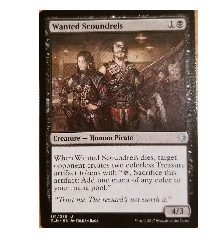

Predicted Card: Wanted Scoundrels.jpg

Test Case 2:


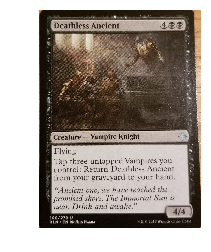

Predicted Card: Deathless Ancient.jpg

Test Case 3:


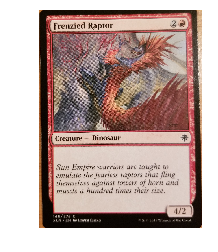

Predicted Card: Frenzied Raptor.jpg

Test Case 4:


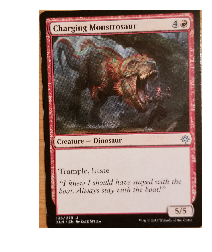

Predicted Card: Charging Monstrosaur.jpg

Test Case 5:


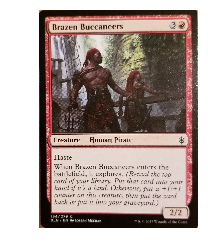

Predicted Card: Brazen Buccaneers.jpg

Test Case 6:


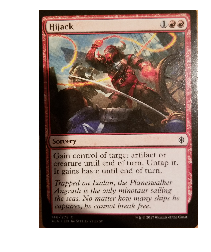

Predicted Card: Hijack.jpg

Test Case 7:


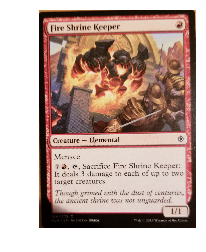

Predicted Card: Fire Shrine Keeper.jpg

Test Case 8:


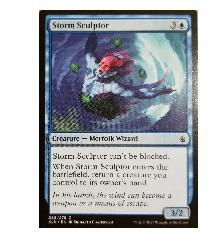

Predicted Card: Storm Sculptor.jpg

Test Case 9:


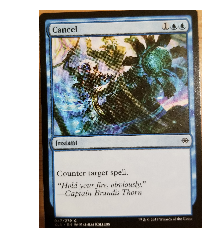

Predicted Card: Cancel.jpg

Test Case 10:


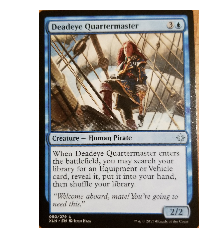

Predicted Card: Deadeye Quartermaster.jpg

Test Case 11:


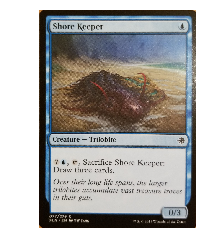

Predicted Card: Shore Keeper.jpg

Test Case 12:


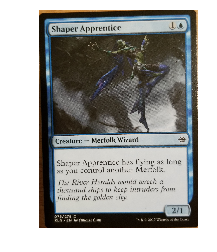

Predicted Card: Shaper Apprentice.jpg

Test Case 13:


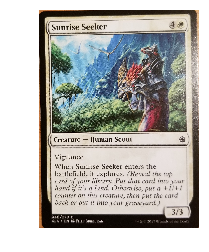

Predicted Card: Sunrise Seeker.jpg

Test Case 14:


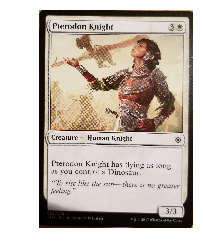

Predicted Card: Pterodon Knight.jpg

Test Case 15:


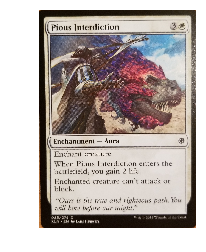

Predicted Card: Pious Interdiction.jpg

Test Case 16:


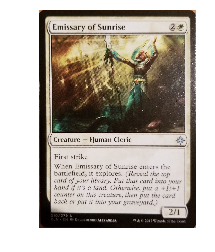

Predicted Card: Emissary of Sunrise.jpg

Test Case 17:


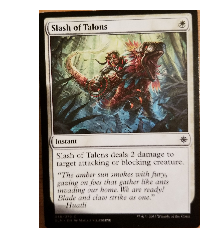

Predicted Card: Slash of Talons.jpg

Test Case 18:


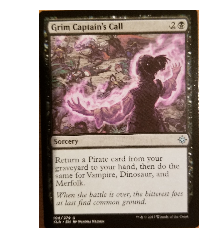

Predicted Card: Grim Captain's Call.jpg

Test Case 19:


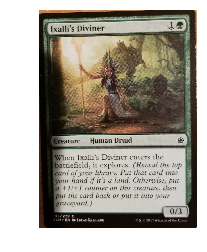

Predicted Card: Ixalli's Diviner.jpg

Test Case 20:


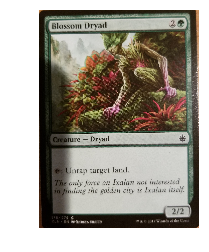

Predicted Card: Blossom Dryad.jpg

Test Case 21:


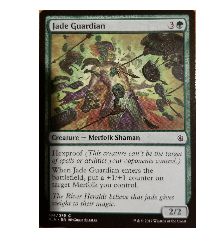

Predicted Card: Jade Guardian.jpg

Test Case 22:


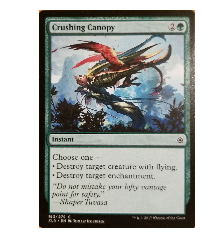

Predicted Card: Crushing Canopy.jpg

Test Case 23:


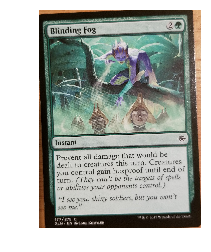

Predicted Card: Plains.jpg

Test Case 24:


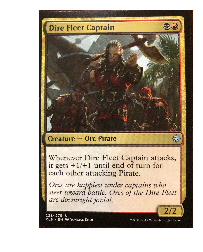

Predicted Card: Dire Fleet Captain.jpg

Test Case 25:


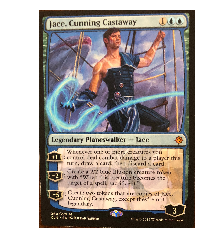

Predicted Card: Jace, Cunning Castaway.jpg

Test Case 26:


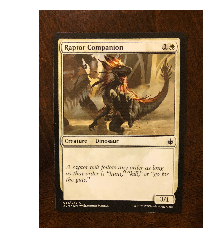

Predicted Card: Island.jpg

Test Case 27:


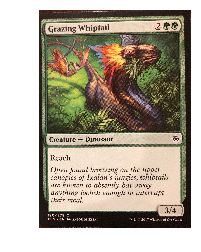

Predicted Card: Grazing Whiptail.jpg

Test Case 28:


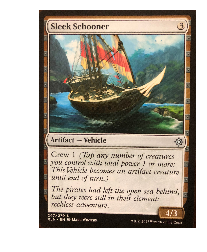

Predicted Card: Sleek Schooner.jpg

Test Case 29:


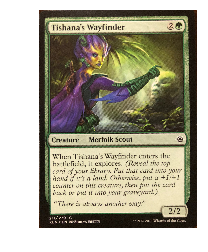

Predicted Card: Tishana's Wayfinder.jpg

Test Case 30:


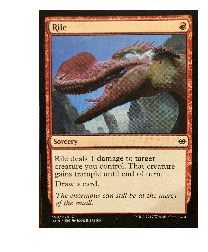

Predicted Card: Rile.jpg

Test Case 31:


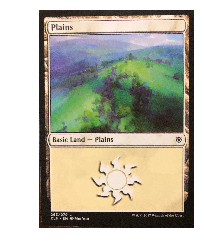

Predicted Card: Plains.jpg

Test Case 32:


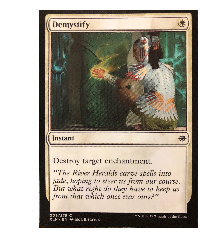

Predicted Card: Demystify.jpg

Test Case 33:


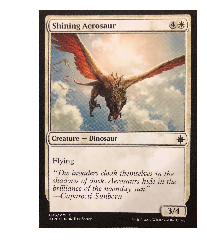

Predicted Card: Shining Aerosaur.jpg

Test Case 34:


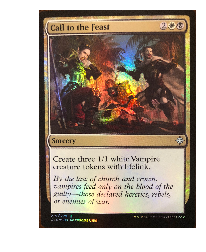

Predicted Card: Call to the Feast.jpg



In [22]:
imagePath = "Data/Images/Ixalan/"
direct = os.fsencode("Data/Images/Ixalan")

testImagePath = "TestCases/"
imageCaseDir = os.fsencode("TestCases")
c = 1

for imageFile in os.listdir(imageCaseDir) :
    imageFileName = os.fsdecode(imageFile)
    testImage = cv2.imread(testImagePath+imageFileName, cv2.IMREAD_UNCHANGED)
    testImage2 = Image.open(testImagePath+imageFileName)
    testImageBW = cv2.cvtColor(testImage, cv2.COLOR_BGR2GRAY)
    currentMin = None
    for file in os.listdir(direct) :
        filename = os.fsdecode(file)
        i = cv2.imread(imagePath+filename)
        iBW = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
        temp = tuple(reversed(i.shape[:-1]))
        resizeImage = cv2.resize(testImageBW, temp)
        score = compareImages(resizeImage, iBW, filename)
        if currentMin==None :
            currentMin=score
        elif currentMin[0] < score[0] :
            currentMin=score
        
    print("Test Case {}:".format(c)) 
    c+=1
    plt.imshow(testImage2)
    plt.axis("off")
    plt.show()
    print("Predicted Card:", currentMin[1])
    print()

<h3>Summary</h3>

<p>While our algorithm is extremely accurate (only seeming to return an incorrect result if the image is not cropped correctly), it is at the cost of a very long search time, as we are searching linearly through the entire set of images. If this were to be worked into any real world application, we would need to modify the algorithm somehow to cut down on the search space and speed up the run time.</p>

<b>Accuracy:</b> 0.94
<br><b>FDR</b>: 0.06